#Aspectos generales del dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
import json
%matplotlib inline

In [7]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import geopandas 

In [10]:
JPvideos = pd.read_csv('JPvideos_cc50.csv')

In [11]:
JPvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,5ugKfHgsmYw,18/07/2002,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25.0,05/02/2018 22:04,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085.0,591.0,189.0,0.0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,VERDADERO,FALSO,FALSO,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...,Kyoto,35.450406,135.333331,POINT (135.3333309 35.4504059)
1,ohObafdd34Y,18/07/2002,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1.0,05/02/2018 23:01,[none],90929.0,442.0,88.0,174.0,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,FALSO,FALSO,FALSO,NaN,Ishikawa,36.560002,136.640021,POINT (136.6400211 36.56000226)
2,aBr2kKAHN6M,18/07/2002,Live Views of Starman,SpaceX,28.0,06/02/2018 16:38,[none],6408303.0,165892.0,2331.0,3006.0,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,FALSO,FALSO,FALSO,NaN,Akita,39.709991,140.089991,POINT (140.0899914 39.70999086)
3,5wNnwChvmsQ,18/07/2002,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25.0,06/02/2018 1:08,アシタノワダイ,96255.0,1165.0,277.0,545.0,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,FALSO,FALSO,FALSO,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...,Kochi,33.562433,133.537523,POINT (133.5375232 33.56243329)
4,B7J47qFvdsk,18/07/2002,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1.0,05/02/2018 21:30,[none],108408.0,1336.0,74.0,201.0,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,FALSO,FALSO,FALSO,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...,Mie,34.717066,136.516670,POINT (136.5166695 34.71706565)


In [12]:
JPvideos.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,20524.000000,2.052200e+04,2.052200e+04,20522.000000,20522.000000,21718.000000,21718.000000
mean,19.806909,2.620338e+05,8.059978e+03,366.841146,1196.135805,35.469712,136.143973
std,6.656333,1.294969e+06,8.385039e+04,2658.662131,14943.970100,2.623478,3.663665
min,1.000000,7.980000e+02,0.000000e+00,0.000000,0.000000,26.207172,127.672972
25%,17.000000,1.710400e+04,1.210000e+02,9.000000,19.000000,34.223116,133.537523
50%,22.000000,6.408850e+04,6.480000e+02,43.000000,133.000000,35.450406,136.516670
75%,24.000000,1.833670e+05,2.303000e+03,178.000000,488.000000,36.549977,139.491062
max,29.000000,6.279639e+07,4.470923e+06,119053.000000,905925.000000,42.930414,143.170010


In [13]:
JPvideos.info()
#las columnas con más datos faltantes son 'trending_date' y 'description'
#hay varias columnas con cerca de 1.2k datos faltantes que pueden ser obviados o eliminados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21718 entries, 0 to 21717
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                21445 non-null  object 
 1   trending_date           8318 non-null   object 
 2   title                   20528 non-null  object 
 3   channel_title           20528 non-null  object 
 4   category_id             20524 non-null  float64
 5   publish_time            20523 non-null  object 
 6   tags                    20525 non-null  object 
 7   views                   20522 non-null  float64
 8   likes                   20522 non-null  float64
 9   dislikes                20522 non-null  float64
 10  comment_count           20522 non-null  float64
 11  thumbnail_link          20522 non-null  object 
 12  comments_disabled       20522 non-null  object 
 13  ratings_disabled        20522 non-null  object 
 14  video_error_or_removed  20522 non-null

In [14]:
JPvideos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

In [ ]:
sns.pairplot(JPvideos)

#Pre-procesamiento de los datos

In [15]:
#Nos centraremos en los datos necesarios para el análisis solicitado
#Eliminaremos columnas que no son relevantes

In [16]:
new_df = JPvideos
new_df = new_df.drop('comments_disabled', axis=1)
new_df = new_df.drop('description', axis=1)
new_df = new_df.drop('ratings_disabled', axis=1)
new_df = new_df.drop('video_error_or_removed', axis=1)
new_df = new_df.drop('thumbnail_link', axis=1)
new_df = new_df.drop('tags', axis=1)
new_df = new_df.drop('trending_date', axis=1)
new_df = new_df.drop('title', axis=1)
new_df = new_df.drop('video_id', axis=1)

new_df

,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,state,lat,lon,geometry
0,時事通信映像センター,25.0,05/02/2018 22:04,188085.0,591.0,189.0,0.0,Kyoto,35.450406,135.333331,POINT (135.3333309 35.4504059)
1,神谷えりな Kamiya Erina 2,1.0,05/02/2018 23:01,90929.0,442.0,88.0,174.0,Ishikawa,36.560002,136.640021,POINT (136.6400211 36.56000226)
2,SpaceX,28.0,06/02/2018 16:38,6408303.0,165892.0,2331.0,3006.0,Akita,39.709991,140.089991,POINT (140.0899914 39.70999086)
3,アシタノワダイ,25.0,06/02/2018 1:08,96255.0,1165.0,277.0,545.0,Kochi,33.562433,133.537523,POINT (133.5375232 33.56243329)
4,シネマトゥデイ,1.0,05/02/2018 21:30,108408.0,1336.0,74.0,201.0,Mie,34.717066,136.516670,POINT (136.5166695 34.71706565)
...,...,...,...,...,...,...,...,...,...,...,...
21713,Ch3Thailand,24.0,13/06/2018 12:00,81321.0,321.0,17.0,61.0,Niigata,37.450413,138.860041,POINT (138.8600406 37.45041302)
21714,SBS 뉴스,25.0,13/06/2018 14:10,433188.0,0.0,0.0,175.0,Yamagata,38.270492,140.320003,POINT (140.3200032 38.27049217)
21715,ブライトサイド | Bright Side Japan,26.0,13/06/2018 9:00,39235.0,1194.0,27.0,46.0,Wakayama,34.223116,135.167708,POINT (135.1677079 34.22311647)
21716,Leo the football TV,17.0,13/06/2018 8:56,49900.0,431.0,66.0,336.0,Iwate,39.720016,141.130031,POINT (141.1300313 39.72001609)


In [17]:
print(new_df.isna().sum())

channel_title    1190
category_id      1194
publish_time     1195
views            1196
likes            1196
dislikes         1196
comment_count    1196
state               0
lat                 0
lon                 0
geometry            0
dtype: int64


In [18]:
#Limpieza de datos
new_df.dropna(subset=["views"], inplace=True)
#Eliminamos valores NaN del dataset
new_df=new_df.dropna()

In [19]:
print(new_df.isna().sum())

channel_title    0
category_id      0
publish_time     0
views            0
likes            0
dislikes         0
comment_count    0
state            0
lat              0
lon              0
geometry         0
dtype: int64


In [20]:
#datos a int
new_df['category_id'] = new_df['category_id'].astype('int')
new_df['likes'] = new_df['likes'].astype(float)
new_df['views'] = new_df['views'].astype(float)
new_df['dislikes'] = new_df['dislikes'].astype(float)
new_df['publish_time'] = pd.to_datetime( new_df['publish_time']) 

In [21]:
#leer json

f = open('JP_category_id.json')

datajson = json.load(f)
datajson

categorynames = {}


for item in datajson['items']:
  categorynames[ int(item['id'])] = item['snippet']['title']

print(categorynames)


{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


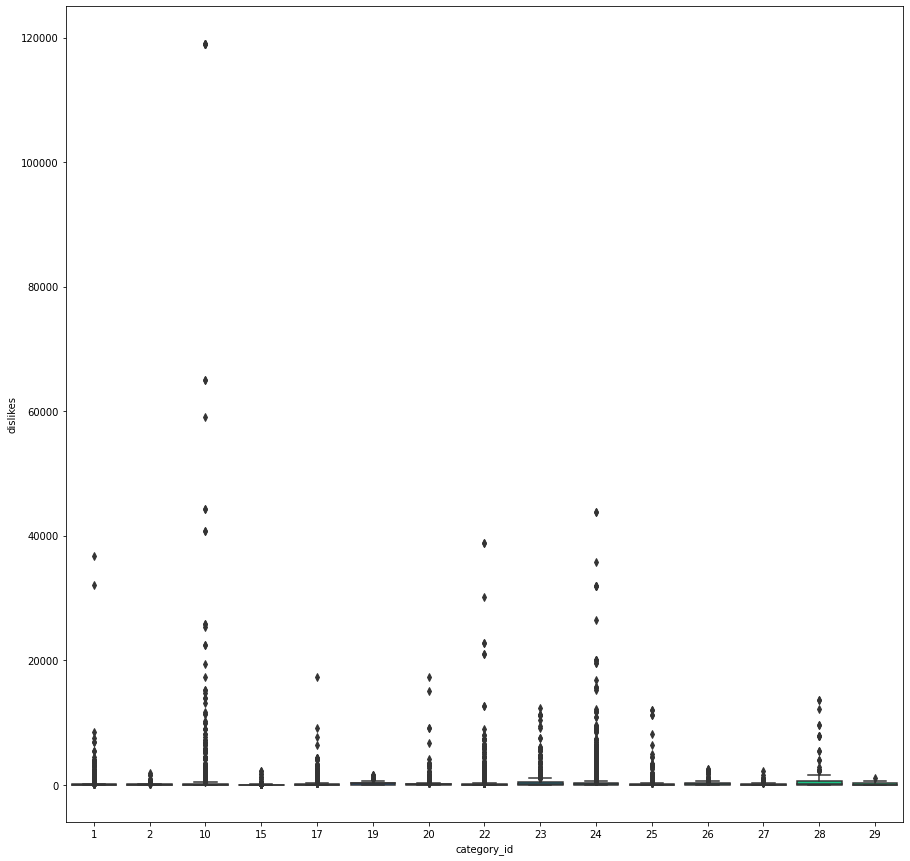

In [22]:
#Buscamos datos atipicos
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='dislikes',data=new_df,palette='winter')

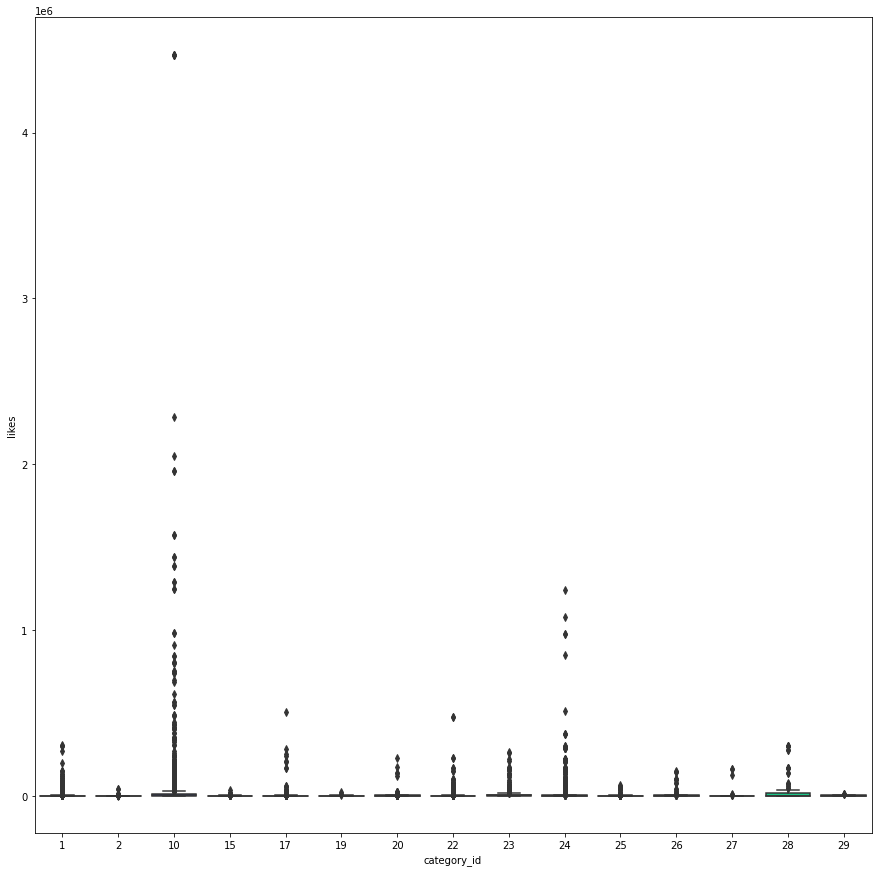

In [24]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='likes',data=new_df,palette='winter')

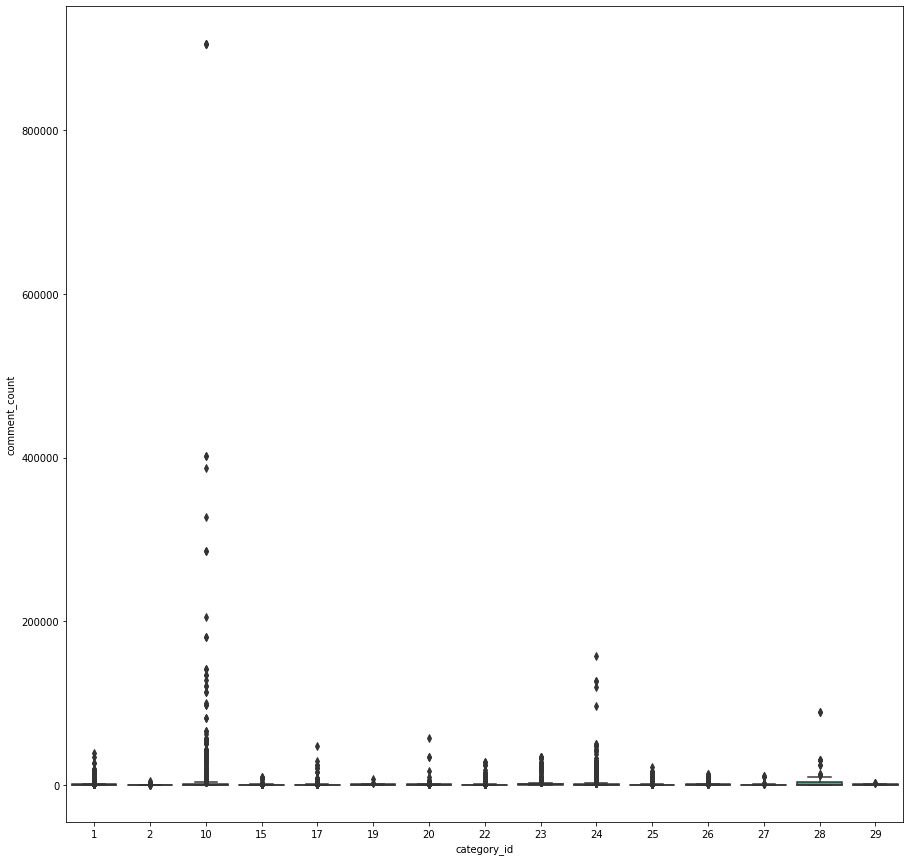

In [25]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='comment_count',data=new_df,palette='winter')

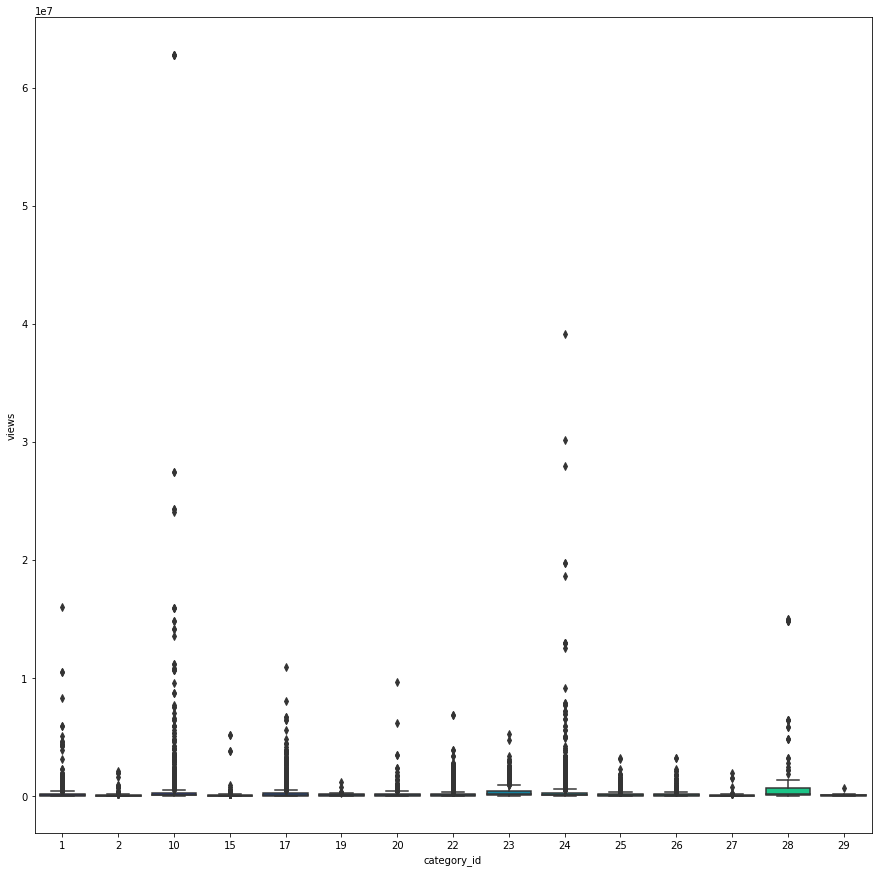

In [26]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='views',data=new_df,palette='winter')

In [27]:
#Cambiamos los datos anómalos 
#mediante flooring y capping

In [28]:
#Para dislikes
dislikes_tenth_p = np.percentile(new_df['dislikes'], 10)
dislikes_ninetieth_p = np.percentile(new_df['dislikes'], 90)
new_df['dislikes'] = np.where(new_df['dislikes']<dislikes_tenth_p, dislikes_tenth_p, new_df['dislikes'])
new_df['dislikes'] = np.where(new_df['dislikes']>dislikes_ninetieth_p, dislikes_ninetieth_p,new_df['dislikes'])
new_df['dislikes']

0        189.0
1         88.0
2        546.0
3        277.0
4         74.0
         ...  
21713     17.0
21714      1.0
21715     27.0
21716     66.0
21717     40.0
Name: dislikes, Length: 20522, dtype: float64

In [29]:
#Para likes
likes_tenth_p = np.percentile(new_df['likes'], 10)
likes_ninetieth_p = np.percentile(new_df['likes'], 90)
new_df['likes'] = np.where(new_df['likes']<likes_tenth_p, likes_tenth_p, new_df['likes'])
new_df['likes'] = np.where(new_df['likes']>likes_ninetieth_p, likes_ninetieth_p,new_df['likes'])
new_df['likes']

0         591.0
1         442.0
2        7734.0
3        1165.0
4        1336.0
          ...  
21713     321.0
21714      22.0
21715    1194.0
21716     431.0
21717     816.0
Name: likes, Length: 20522, dtype: float64

In [30]:
#Para comment_count
comment_count_tenth_p = np.percentile(new_df['comment_count'], 10)
comment_count_ninetieth_p = np.percentile(new_df['comment_count'], 90)
new_df['comment_count'] = np.where(new_df['comment_count']<comment_count_tenth_p, comment_count_tenth_p, new_df['comment_count'])
new_df['comment_count'] = np.where(new_df['comment_count']>comment_count_ninetieth_p, comment_count_ninetieth_p,new_df['comment_count'])
new_df['comment_count']

0           1.0
1         174.0
2        1430.0
3         545.0
4         201.0
          ...  
21713      61.0
21714     175.0
21715      46.0
21716     336.0
21717      59.0
Name: comment_count, Length: 20522, dtype: float64

In [31]:
#Para views
views_tenth_p = np.percentile(new_df['views'], 10)
views_ninetieth_p = np.percentile(new_df['views'], 90)
new_df['views'] = np.where(new_df['views']<views_tenth_p, views_tenth_p, new_df['views'])
new_df['views'] = np.where(new_df['views']>views_ninetieth_p, views_ninetieth_p,new_df['views'])
new_df['views']

0        188085.0
1         90929.0
2        486029.0
3         96255.0
4        108408.0
           ...   
21713     81321.0
21714    433188.0
21715     39235.0
21716     49900.0
21717     46265.0
Name: views, Length: 20522, dtype: float64

Nuevos datos sin/con menos outliers

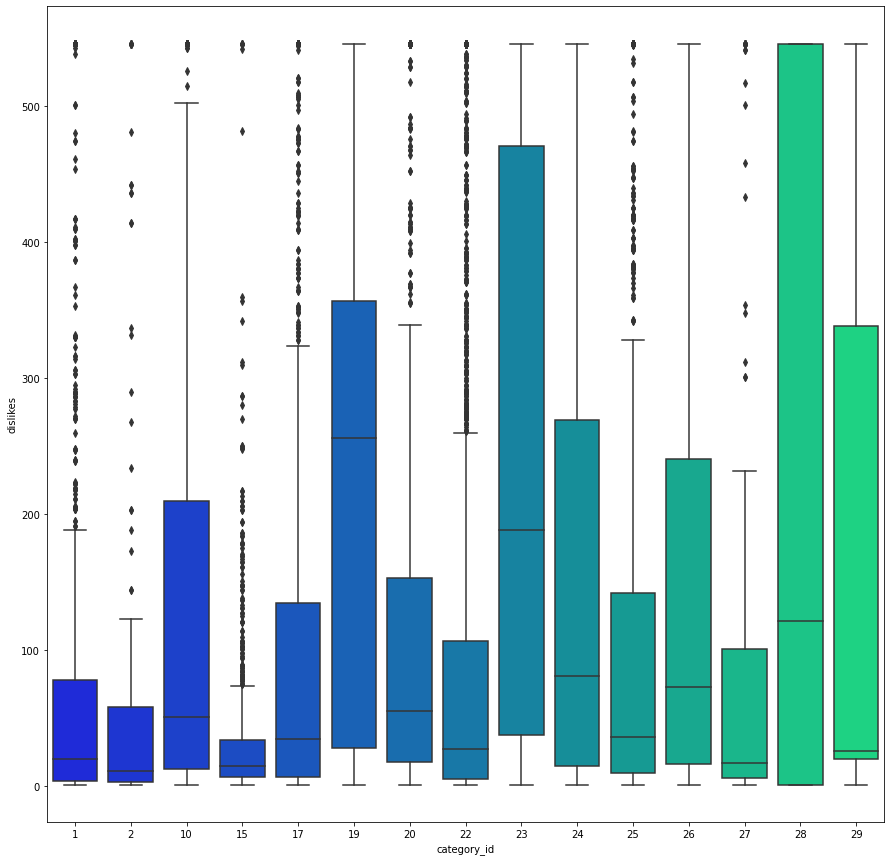

In [32]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='dislikes',data=new_df,palette='winter')

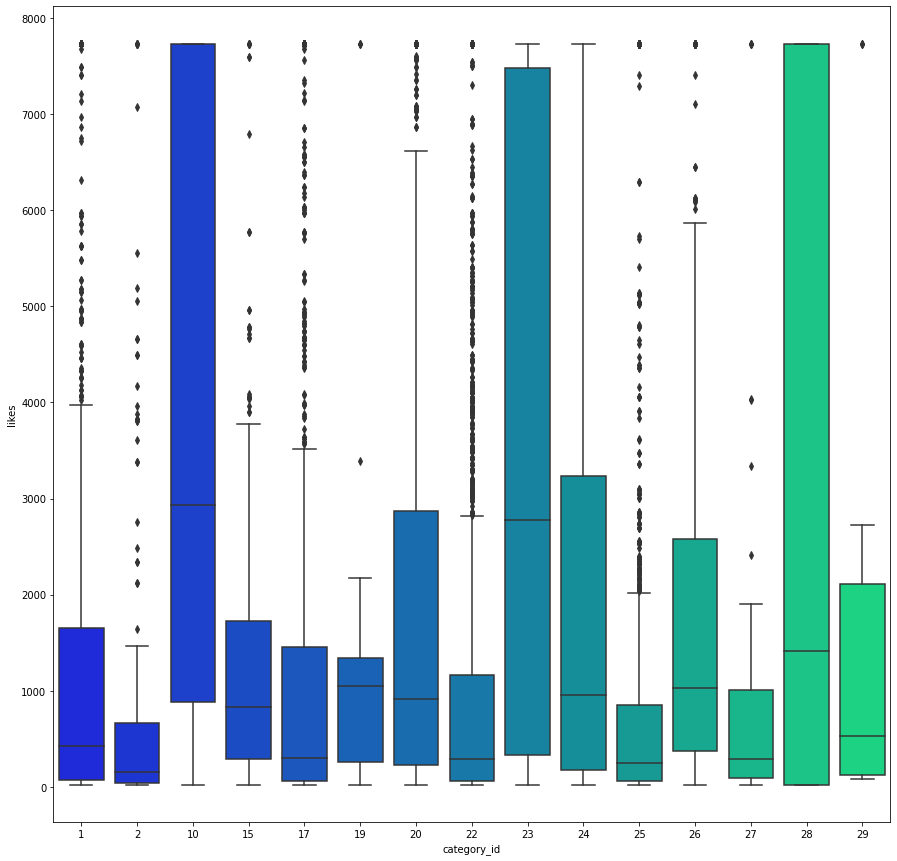

In [33]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='likes',data=new_df,palette='winter')

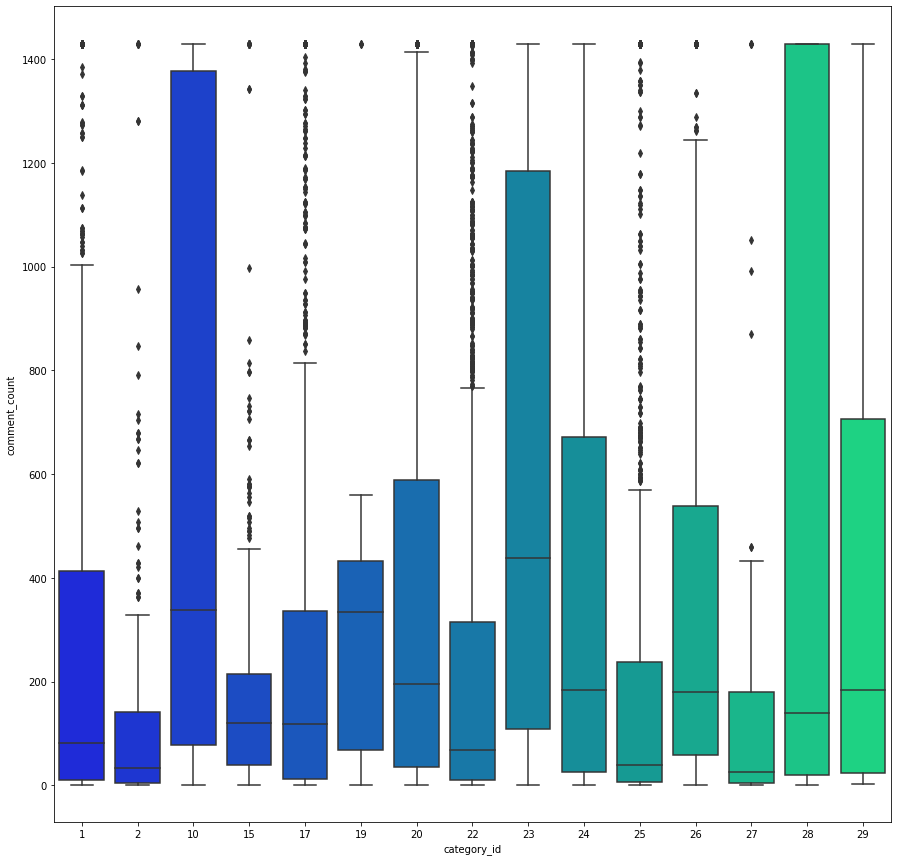

In [34]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='comment_count',data=new_df,palette='winter')

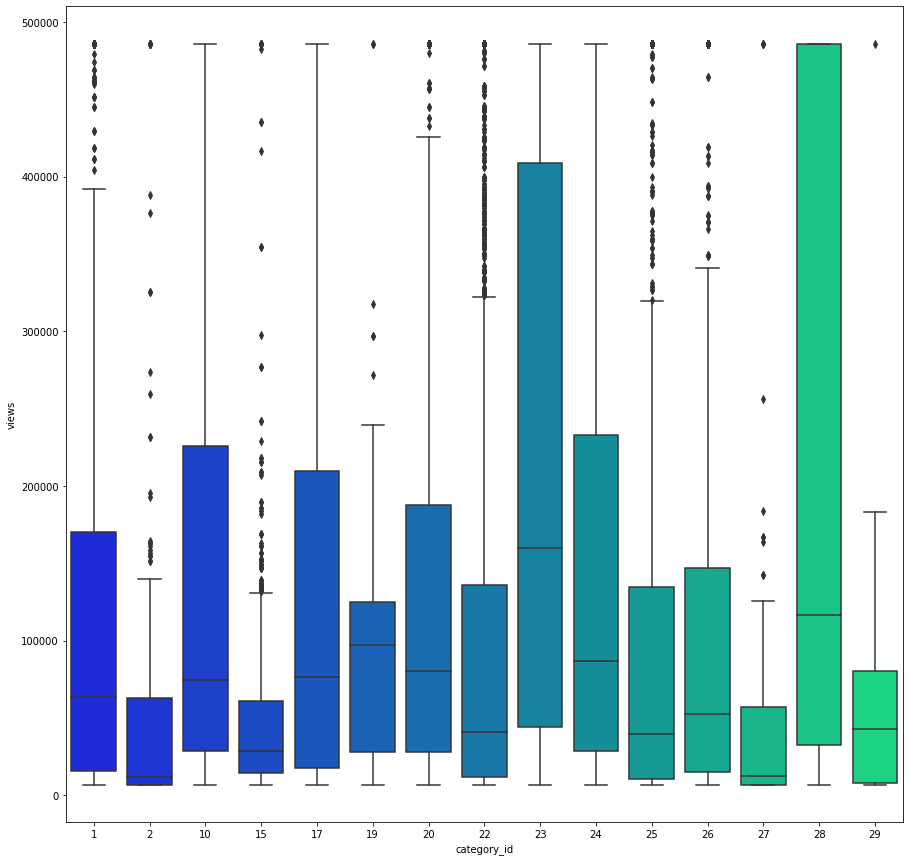

In [35]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='category_id',y='views',data=new_df,palette='winter')

In [36]:
#Visualizacion del nuevo data set
new_df

,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,state,lat,lon,geometry
0,時事通信映像センター,25,2018-05-02 22:04:00,188085.0,591.0,189.0,1.0,Kyoto,35.450406,135.333331,POINT (135.3333309 35.4504059)
1,神谷えりな Kamiya Erina 2,1,2018-05-02 23:01:00,90929.0,442.0,88.0,174.0,Ishikawa,36.560002,136.640021,POINT (136.6400211 36.56000226)
2,SpaceX,28,2018-06-02 16:38:00,486029.0,7734.0,546.0,1430.0,Akita,39.709991,140.089991,POINT (140.0899914 39.70999086)
3,アシタノワダイ,25,2018-06-02 01:08:00,96255.0,1165.0,277.0,545.0,Kochi,33.562433,133.537523,POINT (133.5375232 33.56243329)
4,シネマトゥデイ,1,2018-05-02 21:30:00,108408.0,1336.0,74.0,201.0,Mie,34.717066,136.516670,POINT (136.5166695 34.71706565)
...,...,...,...,...,...,...,...,...,...,...,...
21713,Ch3Thailand,24,2018-06-13 12:00:00,81321.0,321.0,17.0,61.0,Niigata,37.450413,138.860041,POINT (138.8600406 37.45041302)
21714,SBS 뉴스,25,2018-06-13 14:10:00,433188.0,22.0,1.0,175.0,Yamagata,38.270492,140.320003,POINT (140.3200032 38.27049217)
21715,ブライトサイド | Bright Side Japan,26,2018-06-13 09:00:00,39235.0,1194.0,27.0,46.0,Wakayama,34.223116,135.167708,POINT (135.1677079 34.22311647)
21716,Leo the football TV,17,2018-06-13 08:56:00,49900.0,431.0,66.0,336.0,Iwate,39.720016,141.130031,POINT (141.1300313 39.72001609)


#Procesamiento de datos

Categoría de videos

In [37]:
#contar las categorias existentes
categories = new_df['category_id'].value_counts()
print(categories)

#guardar las categorias
keysList = list(categories.keys())

#guardar los nombres de las categorias
keysListNames = list()
for key in keysList:
  keysListNames.append(categorynames[key])



24    6259
22    3915
17    2037
25    1392
10    1290
1     1219
15    1127
20    1030
26     799
23     743
2      280
28     158
19     143
27     112
29      18
Name: category_id, dtype: int64


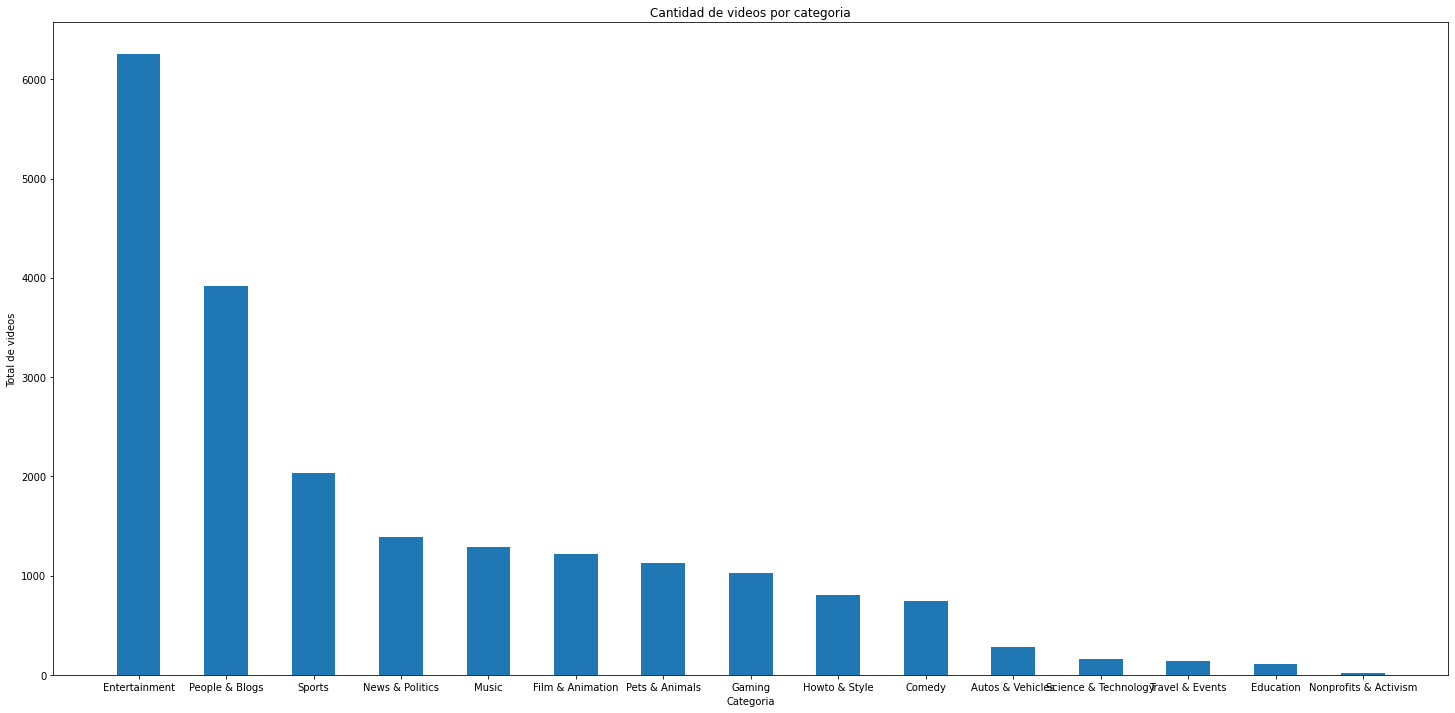

In [38]:
#pregunta 1

fig = plt.figure(figsize = (25, 12))


plt.bar(keysListNames,categories, width = 0.5)

plt.xlabel("Categoria")
plt.ylabel("Total de videos")
plt.title("Cantidad de videos por categoria")
plt.show()

Text(0.5, 0, 'Categorias')

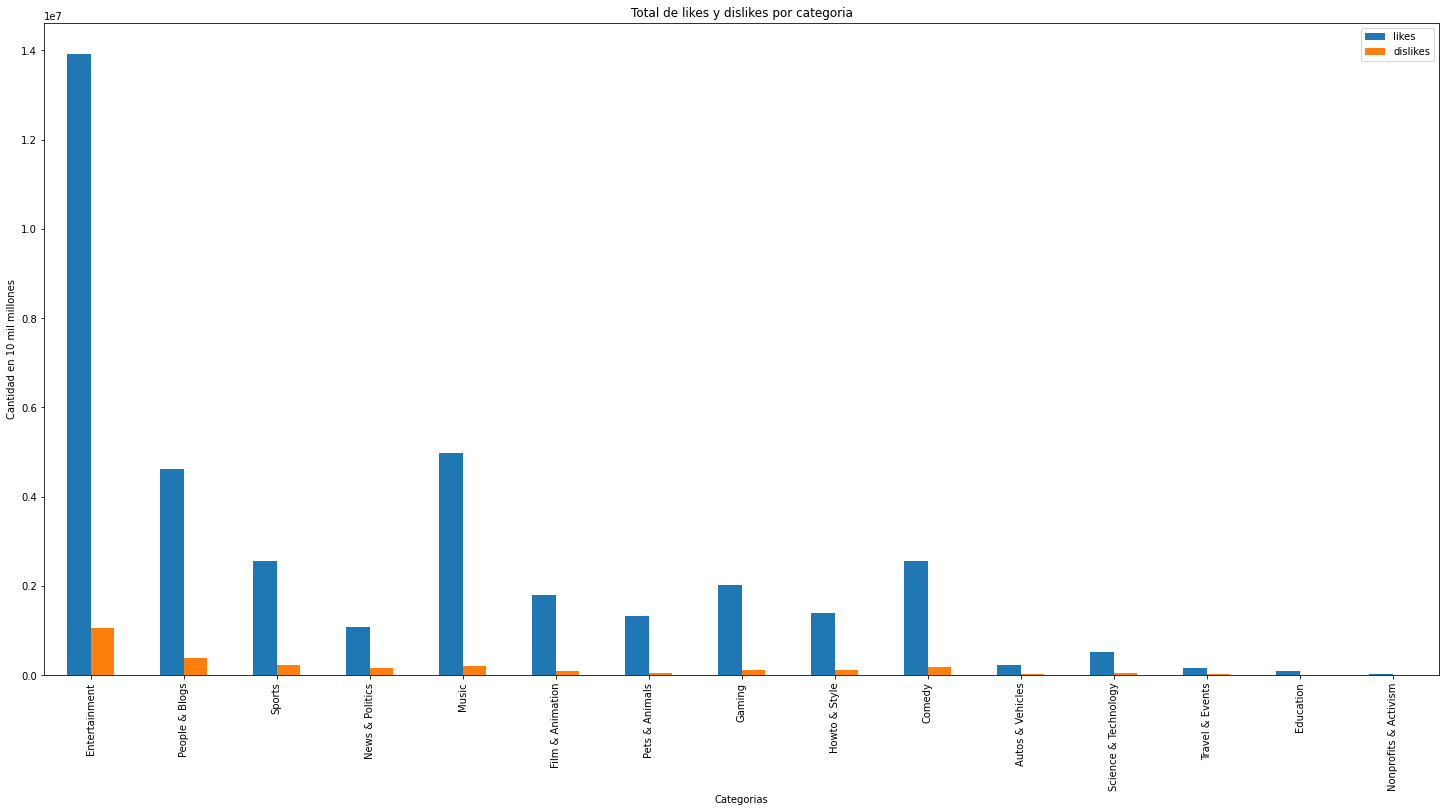

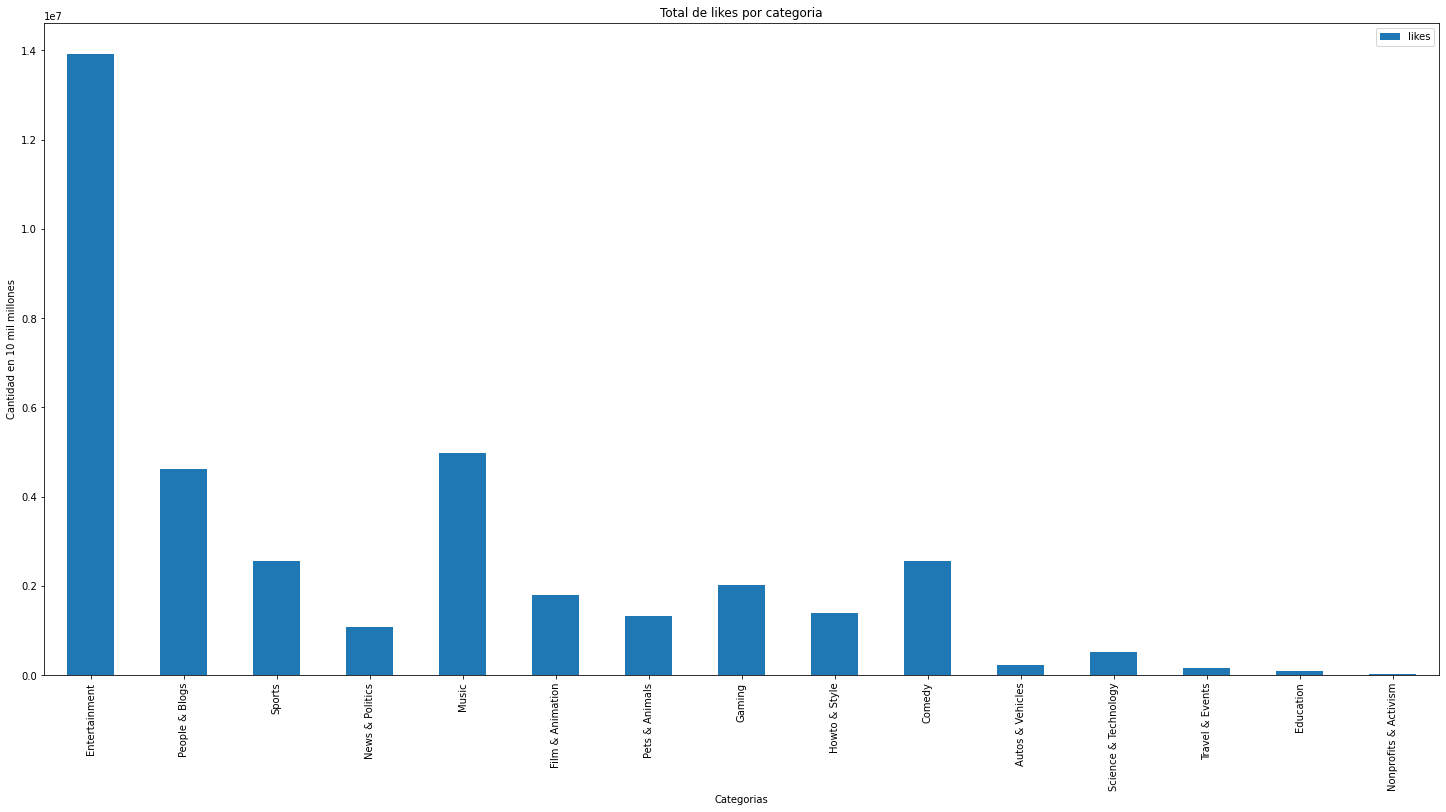

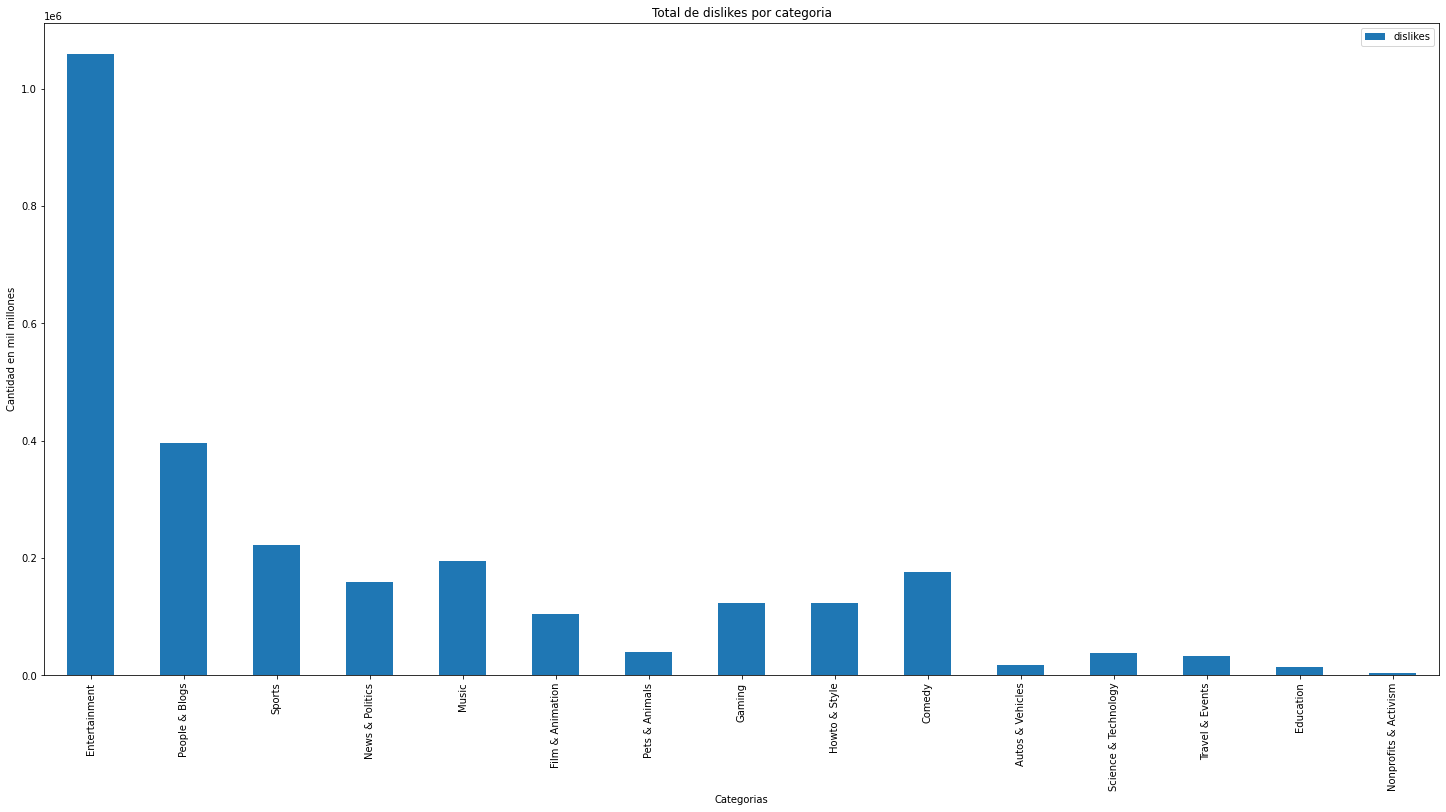

In [39]:
#pregunta 2

likes = np.array([])
dislikes = np.array([])

for key in keysList:
  total_likes = 0
  total_dislikes = 0
 
  filter = new_df['category_id'] == key

  table = new_df.where(filter)
  table.dropna(inplace=True)
  total_likes =  sum(table.likes)
  total_dislikes = sum(table.dislikes)
  likes = np.append(likes, total_likes)
  dislikes = np.append(dislikes, total_dislikes)


df = pd.DataFrame({
    'categoria': keysListNames,
    'likes':likes,
    'dislikes':dislikes
})




vis = df.plot(figsize = (25, 12), x='categoria', y=['likes', 'dislikes'], kind ="bar", title='Total de likes y dislikes por categoria')

vis2 = df.plot(figsize = (25, 12), x='categoria', y='likes', kind ="bar", title='Total de likes por categoria')
vis3 = df.plot(figsize = (25, 12), x='categoria', y='dislikes', kind ="bar", title='Total de dislikes por categoria')

vis.set_ylabel("Cantidad en 10 mil millones")
vis.set_xlabel("Categorias")

vis2.set_ylabel("Cantidad en 10 mil millones")
vis2.set_xlabel("Categorias")

vis3.set_ylabel("Cantidad en mil millones")
vis3.set_xlabel("Categorias")







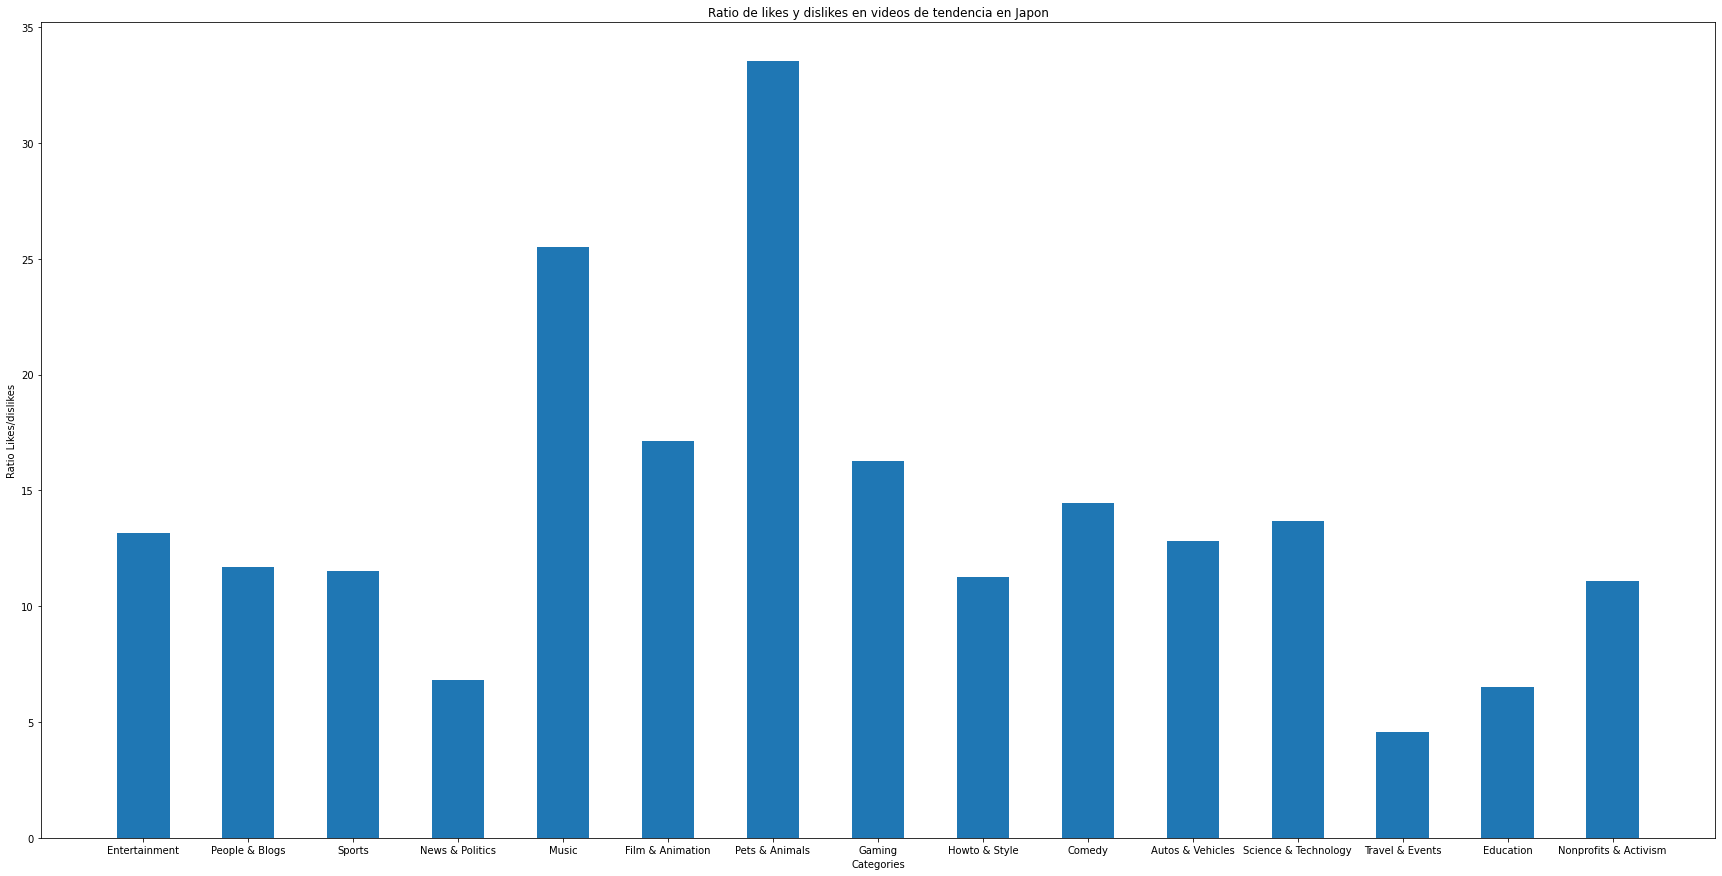

In [40]:
#pregunta 3

ratio = np.array([])

for key in keysList:
  likes = 0
  dislikes = 0
 
  filter = new_df['category_id'] == key

  table = new_df.where(filter)
  table.dropna(inplace=True)
  likes =  sum(table.likes)
  dislikes = sum(table.dislikes)
  #print("category ", categorynames[key], key, "total :", categories[key])
  #print("likes: ", likes)
 # print("dislikes", dislikes)
  #print("ratio :", likes/dislikes)
  ratio = np.append(ratio, (likes/dislikes))


fig = plt.figure(figsize = (30, 15))

plt.bar(keysListNames,ratio, width = 0.5)

plt.xlabel("Categories")
plt.ylabel("Ratio Likes/dislikes")
plt.title("Ratio de likes y dislikes en videos de tendencia en Japon")
plt.show()


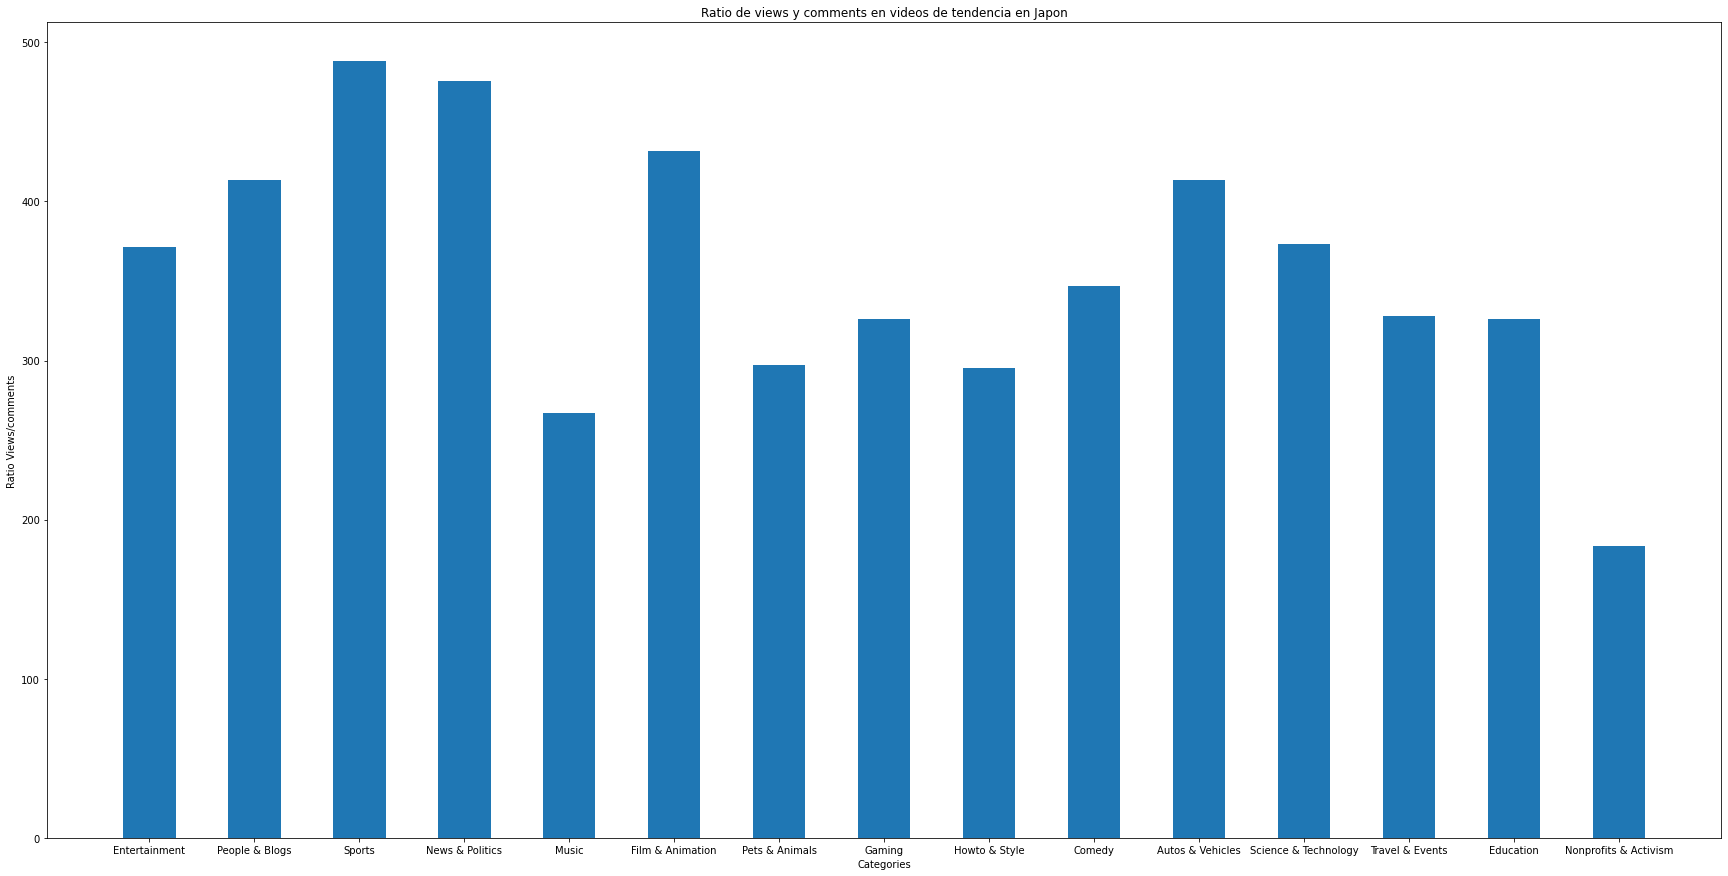

In [41]:
#pregunta 4
ratio = np.array([])

for key in keysList:
  views = 0
  comments = 0
 
  filter = new_df['category_id'] == key

  table = new_df.where(filter)
  table.dropna(inplace=True)
  views =  sum(table.views)
  comments = sum(table.comment_count)
  #print("category ", categorynames[key], key, "total :", categories[key])
  #print("views: ", views)
  #print("comments", comments)
  #print("ratio :", views/comments)
  ratio = np.append(ratio, (views/comments))

fig = plt.figure(figsize = (30, 15))
ratio
plt.bar(keysListNames,ratio, width = 0.5)

plt.xlabel("Categories")
plt.ylabel("Ratio Views/comments")
plt.title("Ratio de views y comments en videos de tendencia en Japon")
plt.show()

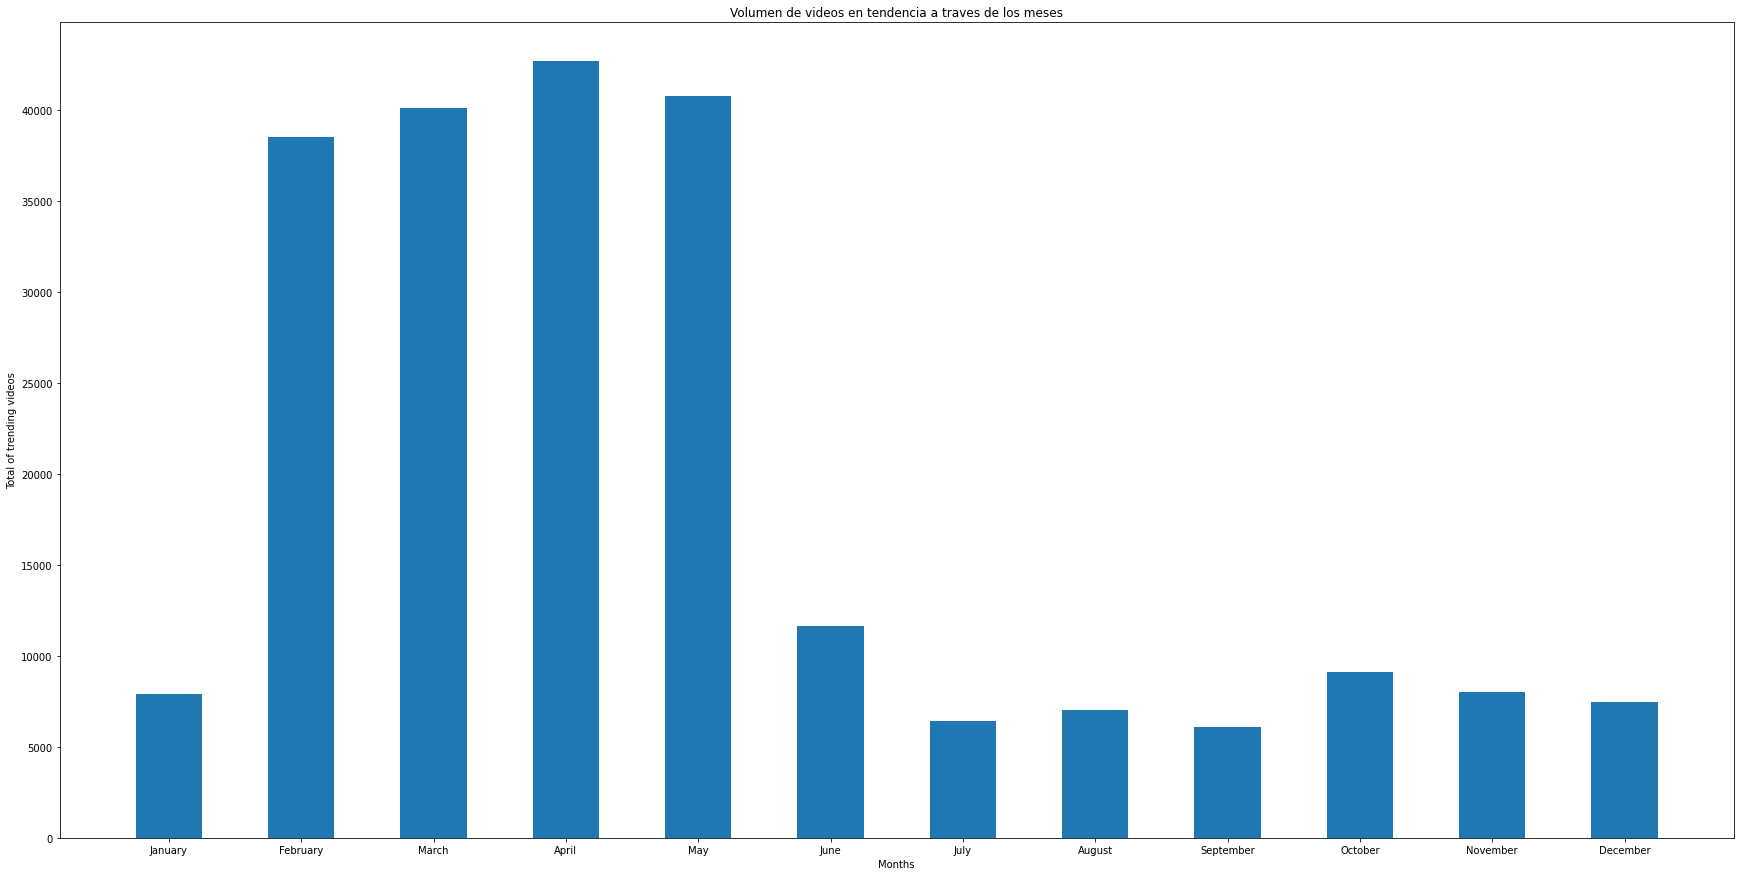

In [42]:
#pregunta 5

ratio = np.array([])
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#filter by time
new_df[new_df['publish_time'].dt.month == 2]

for i in range(12):
  #print(i+1)
  table = new_df[new_df['publish_time'].dt.month == i+1]
  #print(table.size)
  ratio = np.append(ratio, table.size)


fig = plt.figure(figsize = (30, 15))
ratio
plt.bar(meses,ratio, width = 0.5)

plt.xlabel("Months")
plt.ylabel("Total of trending videos")
plt.title("Volumen de videos en tendencia a traves de los meses")
plt.show()

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

font family:  ['Noto Sans JP']
DHCテレビ       169
釣りよかでしょう。    145
釣りよか飯        108
MEGWIN TV     90
はいじぃ迷作劇場      88
Name: channel_title, dtype: int64


<BarContainer object of 4 artists>

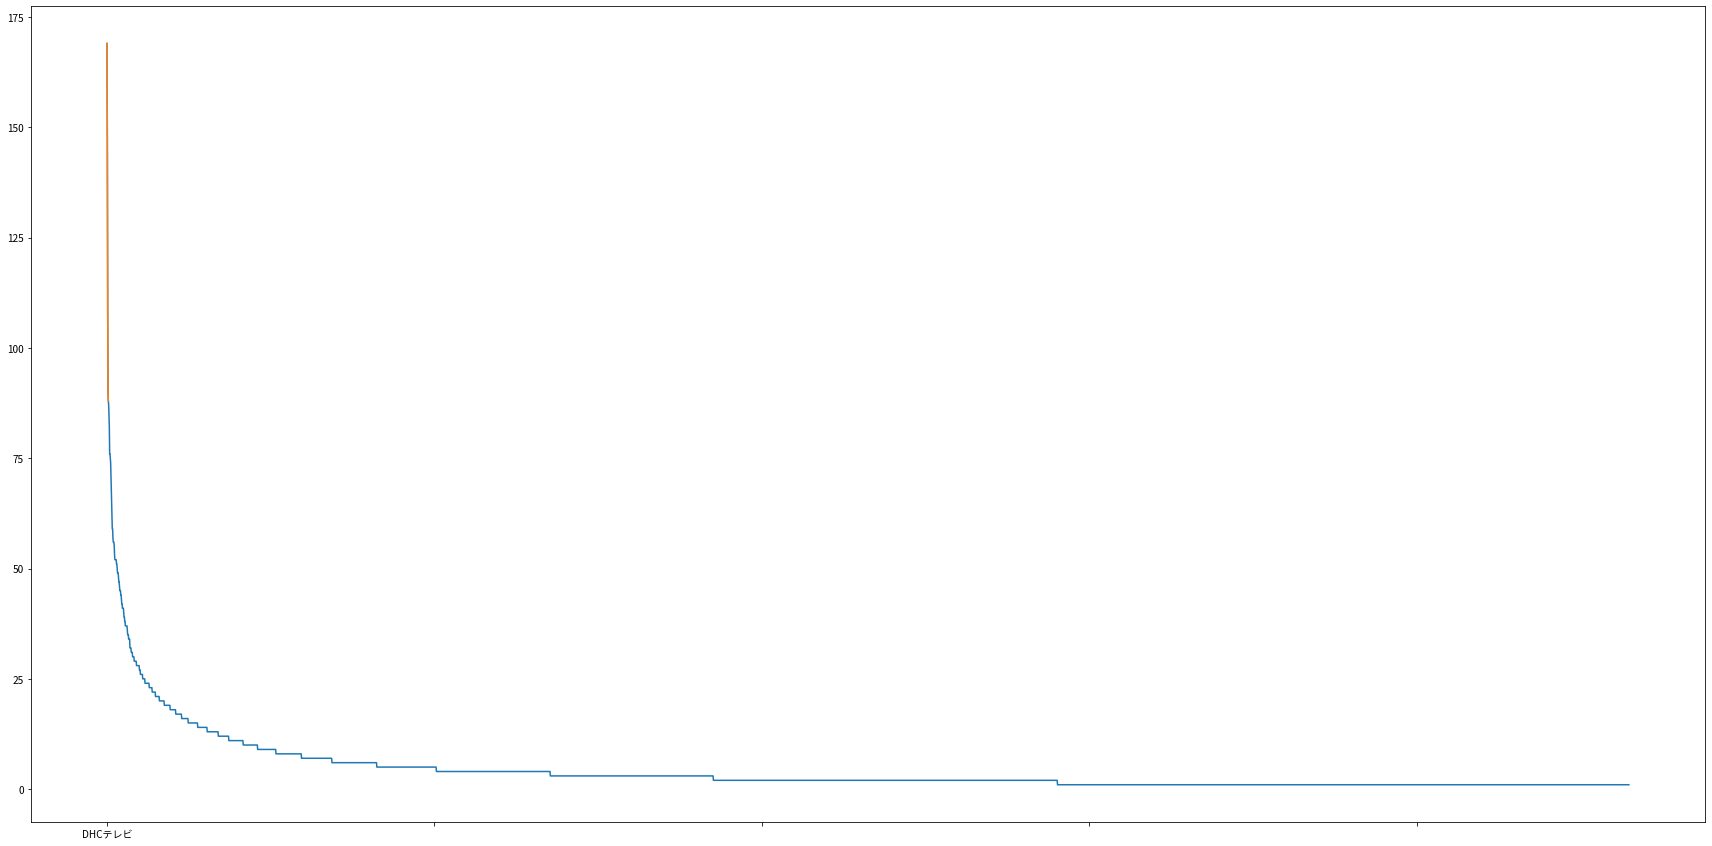

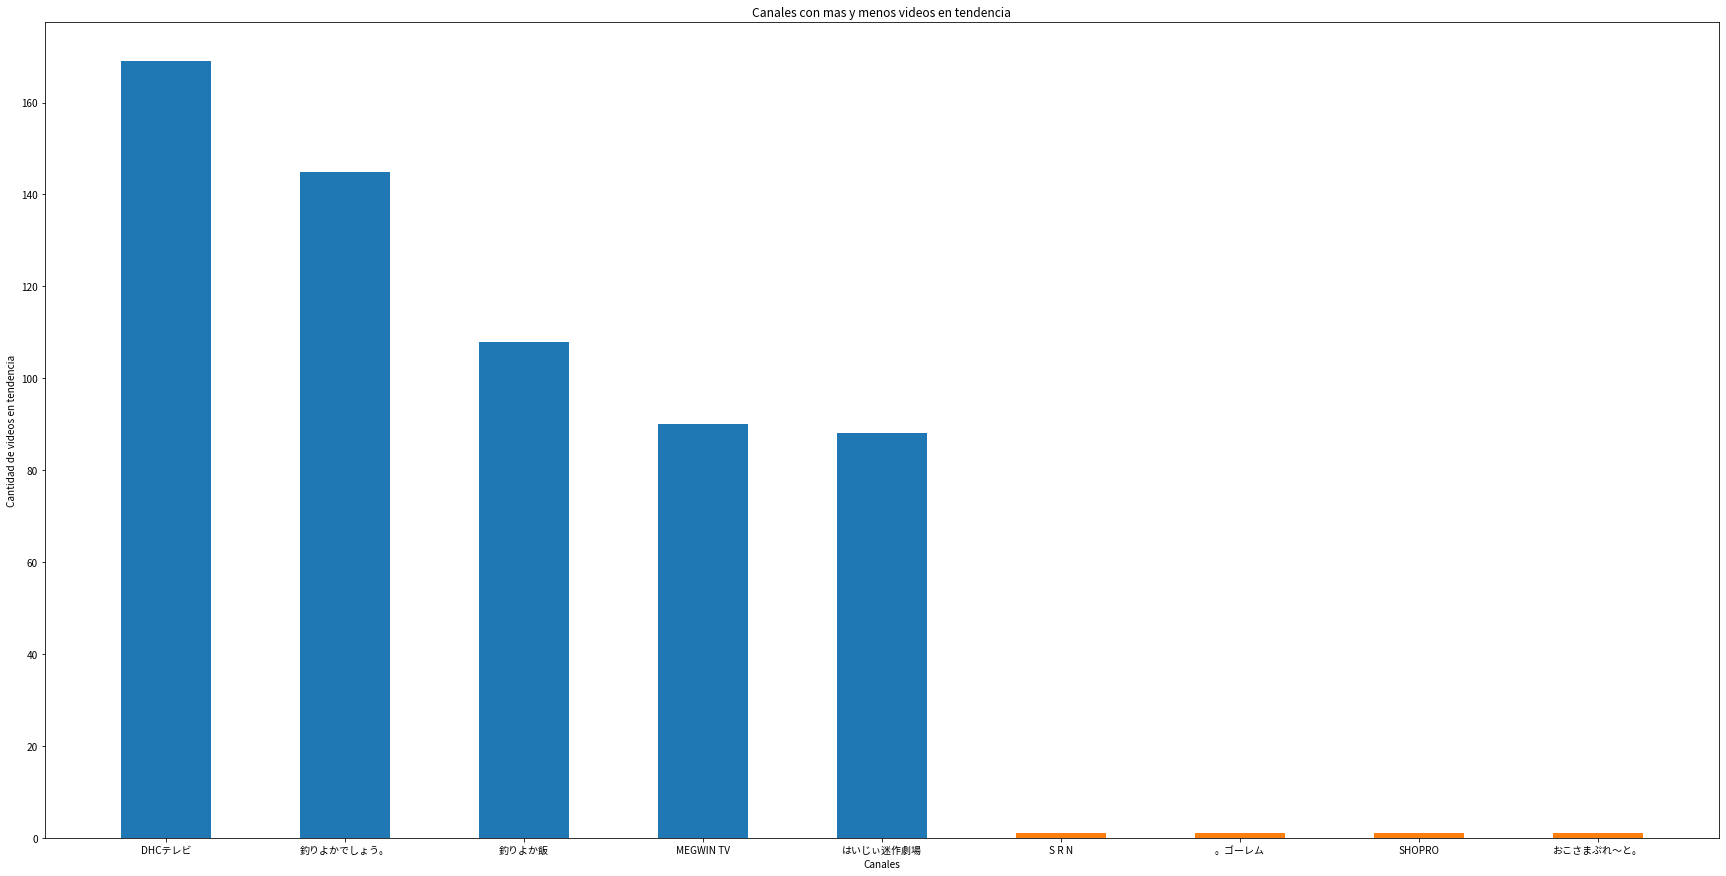

In [44]:
#pregunta 6

font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20JP"
change_matplotlib_font(font_download_url)

#contar los canales
channels = new_df['channel_title'].value_counts()


#for i in channels:
  #print(i)

channels.plot(figsize = (30, 15))

channels[0:5].plot()

topchannels = channels[0:5]
bottomchannels = channels[4645:4649]

print(topchannels)

fig = plt.figure(figsize = (30, 15))
plt.bar(topchannels.keys(), topchannels, width = 0.5)

plt.ylabel("Cantidad de videos en tendencia")
plt.xlabel("Canales")
plt.title("Canales con mas y menos videos en tendencia")


plt.bar(bottomchannels.keys(), bottomchannels, width = 0.5)



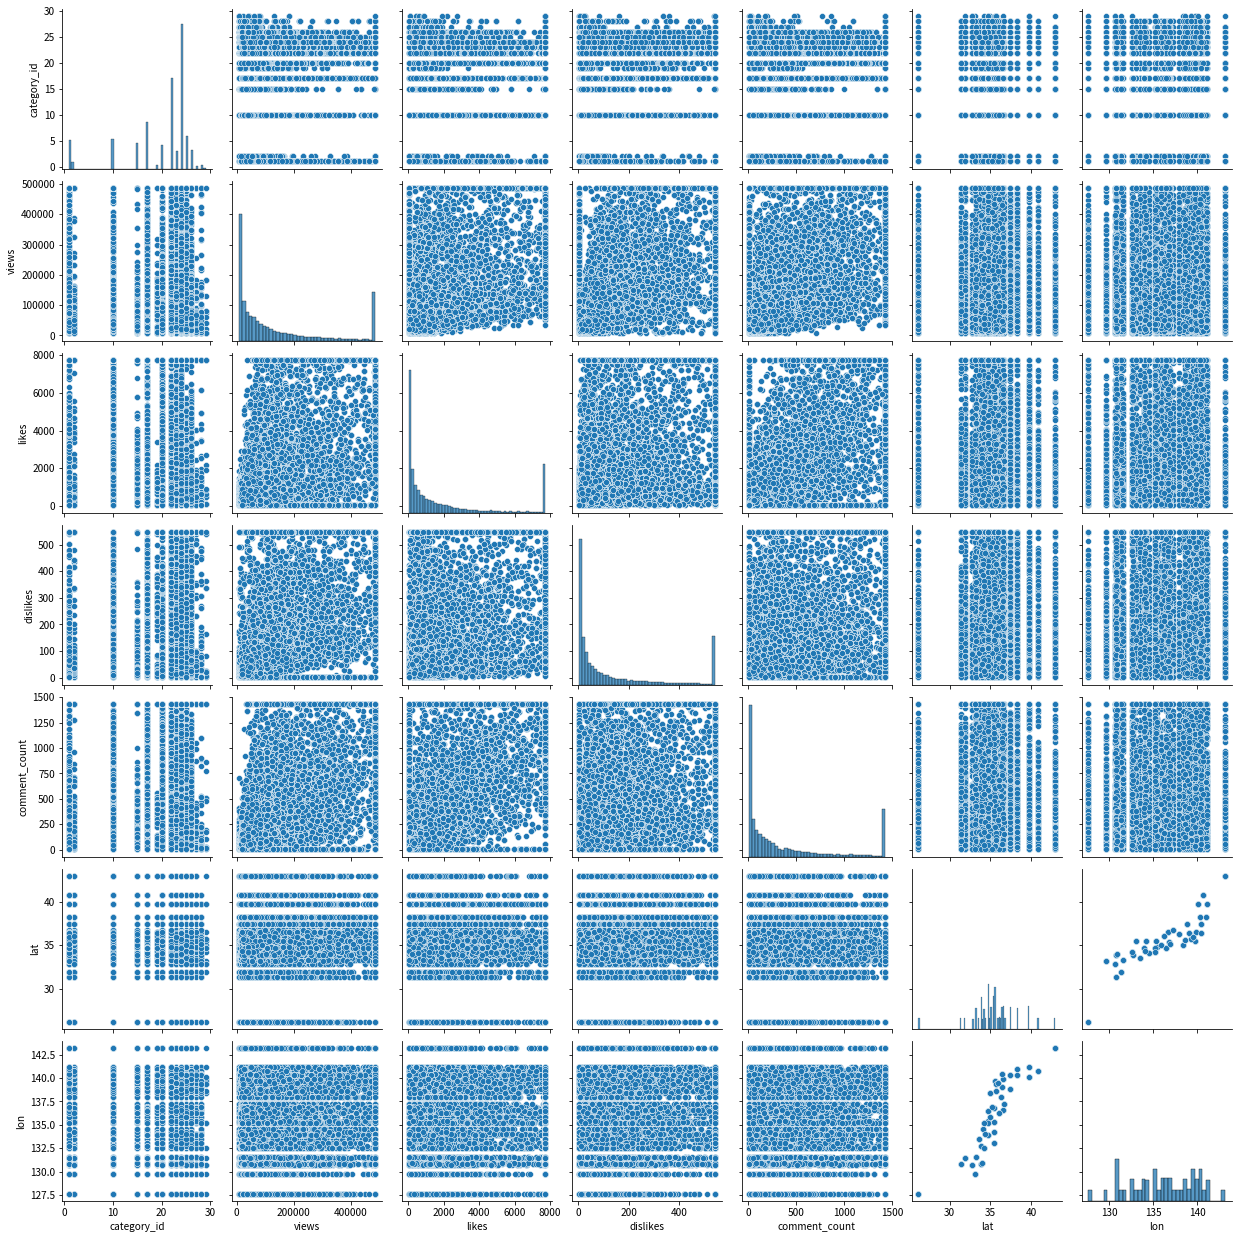

In [45]:
sns.pairplot(new_df)

In [46]:
#Pregunta 7
gdf = geopandas.GeoDataFrame(
    new_df, geometry=geopandas.points_from_xy(new_df.lon, new_df.lat))
gdf.head()

,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,state,lat,lon,geometry
0,時事通信映像センター,25,2018-05-02 22:04:00,188085.0,591.0,189.0,1.0,Kyoto,35.450406,135.333331,POINT (135.33333 35.45041)
1,神谷えりな Kamiya Erina 2,1,2018-05-02 23:01:00,90929.0,442.0,88.0,174.0,Ishikawa,36.560002,136.640021,POINT (136.64002 36.56000)
2,SpaceX,28,2018-06-02 16:38:00,486029.0,7734.0,546.0,1430.0,Akita,39.709991,140.089991,POINT (140.08999 39.70999)
3,アシタノワダイ,25,2018-06-02 01:08:00,96255.0,1165.0,277.0,545.0,Kochi,33.562433,133.537523,POINT (133.53752 33.56243)
4,シネマトゥデイ,1,2018-05-02 21:30:00,108408.0,1336.0,74.0,201.0,Mie,34.717066,136.516670,POINT (136.51667 34.71707)


In [47]:
pip install japanmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 167 kB 16.1 MB/s 
     |████████████████████████████████| 60.9 MB 138 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


<svg version="1.1" viewBox="0 0 1 1" xmlns="http://www.w3.org/2000/svg"><path d="M0.535658,0.125298 L0.534246,0.122494 L0.531116,0.120229 L0.52999,0.118111 L0.531163,0.11424 L0.530995,0.112622 L0.534755,0.112593 L0.535741,0.110517 L0.536994,0.110509 L0.54042,0.113712 L0.542448,0.114393 L0.54305,0.11606 L0.548476,0.118023 L0.5485,0.119194 L0.549198,0.119668 L0.558234,0.117282 L0.558474,0.118127 L0.557668,0.119001 L0.558029,0.119816 L0.563985,0.122098 L0.569026,0.119646 L0.575493,0.112898 L0.575827,0.108109 L0.573017,0.103122 L0.574213,0.0992835 L0.572808,0.0966702 L0.572001,0.0923176 L0.574032,0.0884962 L0.57733,0.0866369 L0.578777,0.0866198 L0.579793,0.0854717 L0.581658,0.0854288 L0.583146,0.0841093 L0.584168,0.0809692 L0.584785,0.0811544 L0.585476,0.0763387 L0.584845,0.0622341 L0.586018,0.0615303 L0.589191,0.0557607 L0.590861,0.0470923 L0.590801,0.0425266 L0.589402,0.0351919 L0.587387,0.0291537 L0.582438,0.0185591 L0.581897,0.0147528 L0.583717,0.0122801 L0.583627,0.0107243 L0.585371,0

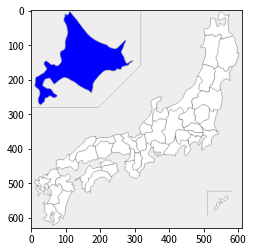

In [48]:
import matplotlib.pyplot as plt
from japanmap import picture, get_data, pref_map
pct = picture({'北海道': 'blue'})  # numpy.ndarray
# pct = picture({1: 'blue'})  # same to above
plt.imshow(pct)  # show graphics
plt.savefig('map.png')  # save to PNG file
svg = pref_map(range(1,48), qpqo=get_data())  # IPython.display.SVG
print(svg.data)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'f', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


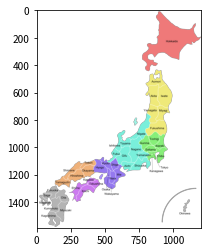

In [49]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('prefectures.png')
imgplot = plt.imshow(img)
plt.show()

Text(0.5, 1.0, 'views per State')

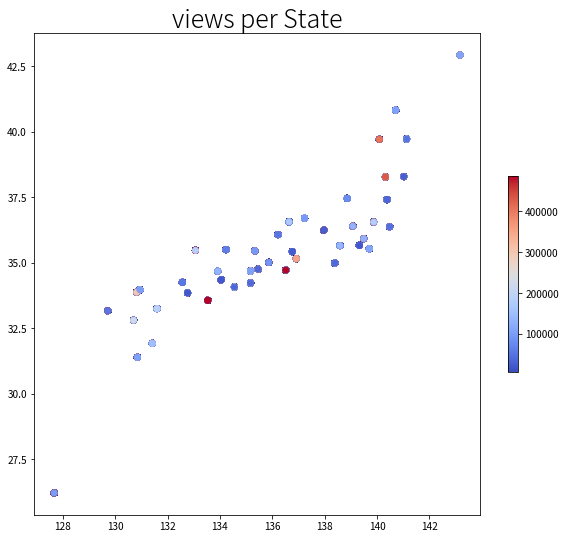

In [50]:
fig, ax = plt.subplots(figsize=(10,12))
gdf.plot(ax=ax, column='views', cmap='coolwarm', legend=True, legend_kwds={'shrink':0.3})
ax.axis('on');
ax.set_title('views per State', fontdict={'fontsize':'25','fontweight':'3'})

Text(0.5, 1.0, 'likes per State')

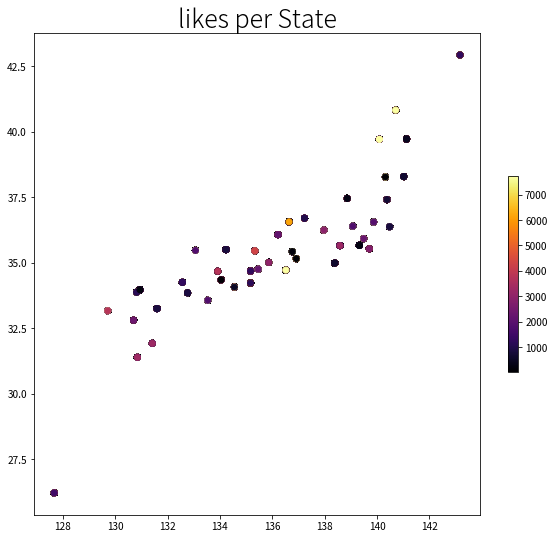

In [51]:
fig, ax = plt.subplots(figsize=(10,12))
gdf.plot(ax=ax, column='likes', cmap='inferno', legend=True, legend_kwds={'shrink':0.3})
ax.axis('on');
ax.set_title('likes per State', fontdict={'fontsize':'25','fontweight':'3'})

Text(0.5, 1.0, 'dislikes per State')

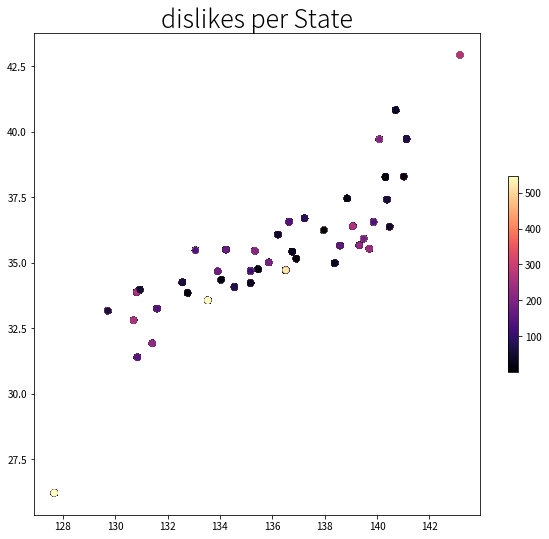

In [52]:
fig, ax = plt.subplots(figsize=(10,12))
gdf.plot(ax=ax, column='dislikes', cmap='magma', legend=True, legend_kwds={'shrink':0.3})
ax.axis('on');
ax.set_title('dislikes per State', fontdict={'fontsize':'25','fontweight':'3'})

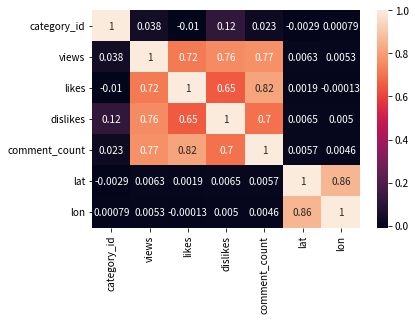

In [53]:
#Correlacon en el nuevo ds
sns.heatmap(new_df.corr(), annot=True)

In [70]:
#guardamos el nuevo dataset generado.
df.to_csv('new_df.csv', index=False)